#Define library

In [ ]:
import pandas as pd
import numpy as np

#Read CSV file into a DataFrame


In [ ]:
df1 = pd.read_csv("/content/winemag-data-assignment-2.csv")

#Print the database to see the content

In [ ]:
df1

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87.0,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87.0,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87.0,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87.0,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87.0,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6154,6154,Australia,The top Australian Cabernets retain distinct v...,NaN,89.0,32.0,Victoria,Pyrenees,NaN,Joe Czerwinski,@JoeCz,Taltarni 2004 Cabernet Sauvignon (Pyrenees),Cabernet Sauvignon,Taltarni
6155,6155,Chile,"Really good wine with blasting dark fruit, win...",Kuyen,89.0,30.0,Maipo Valley,NaN,NaN,Michael Schachner,@wineschach,Antiyal 2006 Kuyen Red (Maipo Valley),Red Blend,Antiyal
6156,6156,France,Importer Bobby Kacher seemingly has a pipeline...,Cuvée Tradition,89.0,13.0,Rhône Valley,Costières de Nîmes,NaN,Joe Czerwinski,@JoeCz,Mas des Bressades 2008 Cuvée Tradition Rosé (C...,Rosé,Mas des Bressades
6157,6157,US,"With a ruby-crimson color, this sparkling wine...",Rouge,89.0,35.0,California,Napa Valley,Napa,NaN,NaN,Frank Family NV Rouge Sparkling (Napa Valley),Sparkling Blend,Frank Family


In [ ]:
df1.describe()

,Unnamed: 0,points,price
count,6159.000000,6132.000000,5737.000000
mean,3079.000000,88.201729,34.633781
std,1778.094486,2.902916,49.271650
min,0.000000,80.000000,4.000000
25%,1539.500000,86.000000,17.000000
50%,3079.000000,88.000000,25.000000
75%,4618.500000,90.000000,40.000000
max,6158.000000,100.000000,1900.000000


#Drop the columns :
- Description
- Region_2
- Taster_name
- Taster_twitter_handle
- Title
- Province
- Unnamed: 0
- designation.

In [ ]:
df1 = df1.drop(["description","province","title","taster_twitter_handle","taster_name","region_2","Unnamed: 0","designation"],axis=1)

#Define function to convert each word to number 

In [ ]:
def convert_text_to_num(x):
    set_x=set(x)
    w_index={}
    for i,w in enumerate(set_x):
        w_index[w]=i
    x=x.replace(w_index)
    return x

## convert (country) column to number

In [ ]:
df1.country=convert_text_to_num(df1.country) 

## convert (region_1) column to number

In [ ]:
df1.region_1 =convert_text_to_num(df1.region_1)

## convert (variety) column to number

In [ ]:
df1.variety =convert_text_to_num(df1.variety)

## convert (winery) column to number

In [ ]:
df1.winery =convert_text_to_num(df1.winery)

#Fill in missing values:


- in (point) using the median value

In [ ]:
df1.points.fillna(df1.points.median(),inplace=True)

- in (price) using the mean value

In [ ]:
df1.price.fillna(df1.price.mean(),inplace=True)

#Split the data into inputs/features (x) and output/target ( y ).

In [ ]:
x = df1.filter(items=["country","points","region_1","variety","winery"]) #input
y = df1.filter(items=["price"]) #output


#Print the Describe  and info

In [ ]:
df1

,country,points,price,region_1,variety,winery
0,16,87.0,34.633781,366,182,1608
1,27,87.0,15.000000,0,175,1549
2,31,87.0,14.000000,583,94,734
3,31,87.0,13.000000,162,174,235
4,31,87.0,65.000000,583,90,3325
...,...,...,...,...,...,...
6154,24,89.0,32.000000,14,36,1637
6155,14,89.0,30.000000,0,251,3686
6156,28,89.0,13.000000,446,148,1580
6157,31,89.0,35.000000,242,215,2743


In [ ]:
df1.describe()

,country,points,price,region_1,variety,winery
count,6159.000000,6159.000000,6159.000000,6159.000000,6159.000000,6159.000000
mean,24.705472,88.200844,34.633781,271.274882,142.618932,1978.682416
std,7.768510,2.896576,47.553429,204.778794,71.545901,1138.908910
min,0.000000,80.000000,4.000000,0.000000,0.000000,0.000000
25%,16.000000,86.000000,17.000000,71.000000,90.000000,993.500000
50%,28.000000,88.000000,27.000000,251.000000,150.000000,1980.000000
75%,31.000000,90.000000,40.000000,460.500000,189.000000,2961.500000
max,31.000000,100.000000,1900.000000,613.000000,284.000000,3957.000000


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6159 entries, 0 to 6158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   6159 non-null   int64  
 1   points    6159 non-null   float64
 2   price     6159 non-null   float64
 3   region_1  6159 non-null   int64  
 4   variety   6159 non-null   int64  
 5   winery    6159 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 288.8 KB


#plot (histogram) with set the size of the plots to (10,10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9bd9bcb150>,
      dtype=object)

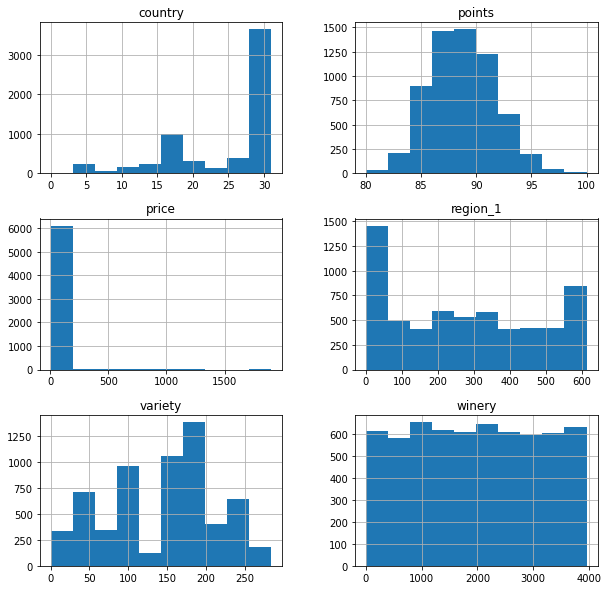

In [ ]:
df1.hist(figsize=[10,10])

#save data 

In [ ]:
df1.to_csv("data.csv")